Experiment No : 8 Discrete Fourier Transform <br>


Aim: <br>
1.	Compute the DFT of the image and plot its Magnitude and Phase Spectrum
2.	Implement low pass and high pass filtering in frequency domain using DFT and comment on the subjective quality of the reconstructed image.


In [ ]:
import cv2
from sympy import fft, ifft
import numpy as np
import matplotlib.pyplot as plt

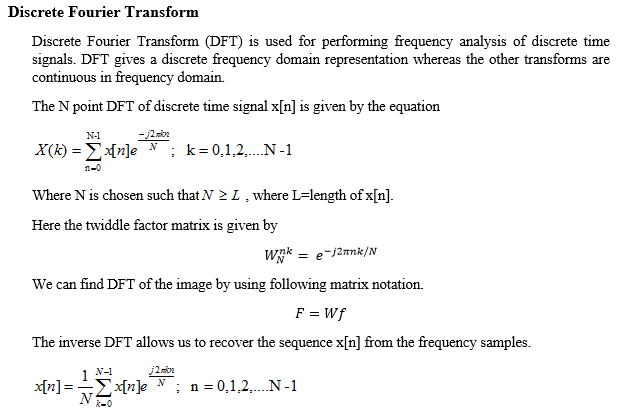

Example :

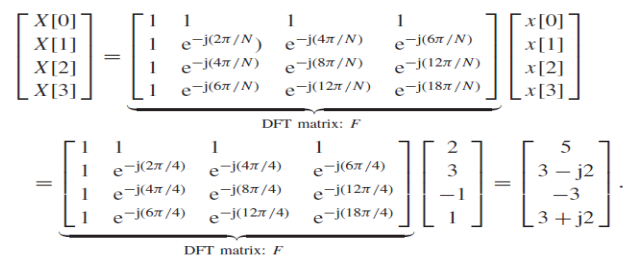

In [ ]:
"""Function to calculate the discrete Fourier Transform
of a 1D real-valued signal x """








DFT Transformed Matrix of x = [ 5.+0.00000000e+00j  3.-2.00000000e+00j -3.-9.79717439e-16j
  3.+2.00000000e+00j]


DFT of x [5, 3 + 2*I, -3, 3 - 2*I]


compute DFT using built in function

In [ ]:
x=[2,3,-1,1]
xfft= np.fft.fft(x)
print('DFT of x', xfft)

xrec = np.fft.ifft(xfft)

print('Recovered x=', xrec)



DFT of x [ 5.+0.j  3.-2.j -3.+0.j  3.+2.j]
Recovered x= [ 2.+0.j  3.+0.j -1.+0.j  1.+0.j]


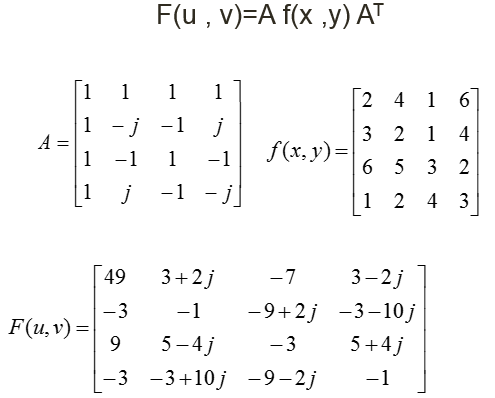

In [ ]:
x=[[2,4,1,6],[3,2,1,4],[6,5,3,2],[1,2,4,3]]

xfft= np.fft.fft2(x)
print('DFT of x', xfft)

# 49 in output is dc coeff,their u get low freq(bright image) as u go further u get high freq ;

DFT of x [[49. +0.j  3. +2.j -7. +0.j  3. -2.j]
 [-3. +0.j -1. +0.j -9. +2.j -3.-10.j]
 [ 9. +0.j  5. -4.j -3. +0.j  5. +4.j]
 [-3. +0.j -3.+10.j -9. -2.j -1. +0.j]]


To center the DFT <br>
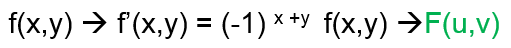

Log transform

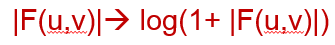

In [ ]:
#Shift the origin. Equvalent to multiplying by (-1)^x+y
xfft_center = np.fft.fftshift(xfft)
print(xfft_center)
#compute the log


[[-3. +0.j  5. +4.j  9. +0.j  5. -4.j]
 [-9. -2.j -1. +0.j -3. +0.j -3.+10.j]
 [-7. +0.j  3. -2.j 49. +0.j  3. +2.j]
 [-9. +2.j -3.-10.j -3. +0.j -1. +0.j]]


In [ ]:
x_rec = np.fft.ifft2(xfft)
print('Recorded matrix',x_rec)

Recorded matrix [[2.+0.j 4.+0.j 1.+0.j 6.+0.j]
 [3.+0.j 2.+0.j 1.+0.j 4.+0.j]
 [6.+0.j 5.+0.j 3.+0.j 2.+0.j]
 [1.+0.j 2.+0.j 4.+0.j 3.+0.j]]


# To compute the DFT of a image

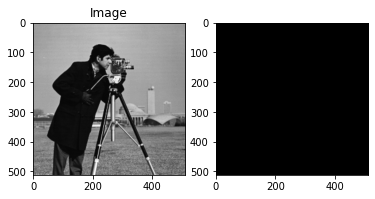

In [ ]:
# Read the image
img = cv2.imread('cameraman.tif',0)

# Compute the FFT
imgfft = np.fft.fft2(img, s=None, axes=(-2,-1), norm=None)

plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Image')
plt.subplot(122)
plt.imshow(np.abs(imgfft),cmap='gray')

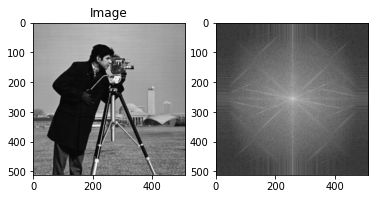

In [ ]:
#Shift the origin. Equvalent to multiplying by (-1)^x+y

# Read the image
img = cv2.imread('cameraman.tif',0)

# Compute the FFT
imgfft = np.fft.fft2(img, s=None, axes=(-2,-1), norm=None)
imgffts= np.fft.fftshift(imgfft)

# Compute the log of magnitude for clear visualization
imgfftl = np.log10(1+np.abs(imgffts))

plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Image')
plt.subplot(122)
plt.imshow(np.abs(imgfftl),cmap='gray')

# compute the Magnitude spectrum of the transformed image



Plot the image, magnitude spectrun, phase spectrum, log transformed magnitude spectrum

Text(0.5, 1.0, 'Phase Spectrum')

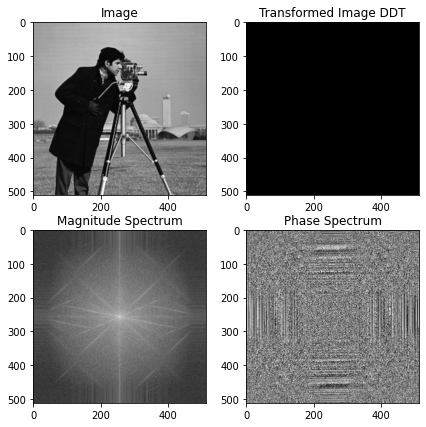

In [ ]:

# Read the image
img = cv2.imread('cameraman.tif',0)

# Compute the FFT
imgfft = np.fft.fft2(img, s=None, axes=(-2,-1), norm=None)
imgffts= np.fft.fftshift(imgfft)

# Compute the log of magnitude for clear visualization
imgfftl = np.log10(1+np.abs(imgffts))

# Compute the Phase spectrum of the transformed image
imgfftphase= np.angle(imgfft)

plt.figure(figsize=(7,7))
plt.subplot(221)
plt.imshow(img,cmap='gray')
plt.title('Image')
plt.subplot(222)
plt.imshow(np.abs(imgfft),cmap='gray')
plt.title('Transformed Image DDT')
plt.subplot(223)
plt.imshow(imgfftl,cmap='gray')
plt.title('Magnitude Spectrum')
plt.subplot(224)
plt.imshow(imgfftphase,cmap='gray')
plt.title('Phase Spectrum')
# compute the Magnitude spectrum of the transformed image





Filtering the low frequency and the high frequency components of an image

Develop a ideal LPF and HPF mask <br>
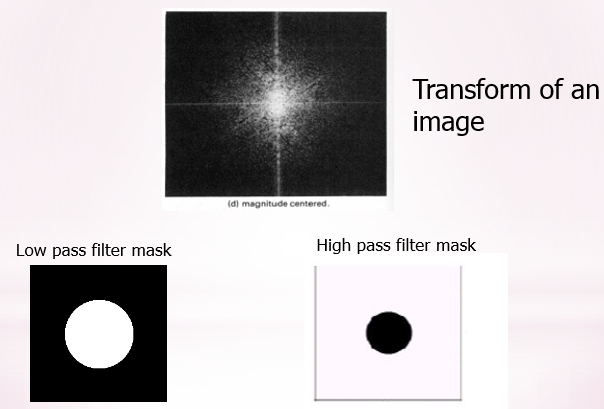

Text(0.5, 1.0, 'HPF Mask')

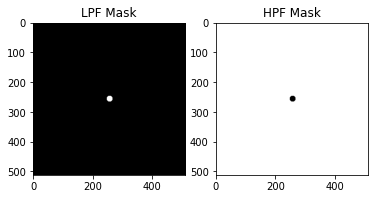

In [ ]:
# Compute the rows and columns of the image
m,n = img.shape
r=10

# copy the image as a lpf and hpf variable
lpf = img.copy()
hpf = img.copy()

#Take radii d0= 10, 30,60,160,460
for i in range(m):
  for j in range(n):
    d1= np.sqrt((i-m//2)**2 + (j-n//2)**2)
    if d1<r:
      lpf[i,j]=1
      hpf[i,j]=0
    else:
      lpf[i,j]=0
      hpf[i,j]=1

#Creat an ideal lpf and ideal hpf masks



#Plot orinal, low pass filtered and high pass filtered image

plt.subplot(121)
plt.imshow(lpf,cmap='gray')
plt.title('LPF Mask')
plt.subplot(122)
plt.imshow(hpf,cmap='gray')
plt.title('HPF Mask')

Text(0.5, 1.0, 'High Filtered Image')

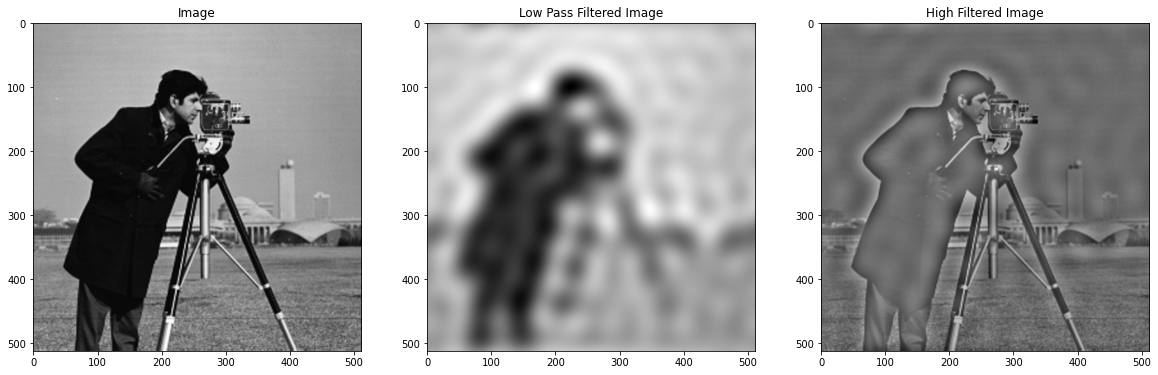

In [ ]:
# multiply lpf mask with the fft image
filtl = imgffts*lpf
img_low = np.fft.fftshift(filtl)
img_blur =np.real(np.fft.ifft2(img_low))
filth = imgffts*hpf
img_high = np.fft.fftshift(filth)
img_sharp =np.real(np.fft.ifft2(img_high))

#Plot orinal, low pass filtered and high pass filtered image
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(img,cmap='gray')
plt.title('Image')
plt.subplot(132)
plt.imshow(img_blur,cmap='gray')
plt.title('Low Pass Filtered Image')
plt.subplot(133)
plt.imshow(img_sharp,cmap='gray')
plt.title('High Filtered Image')



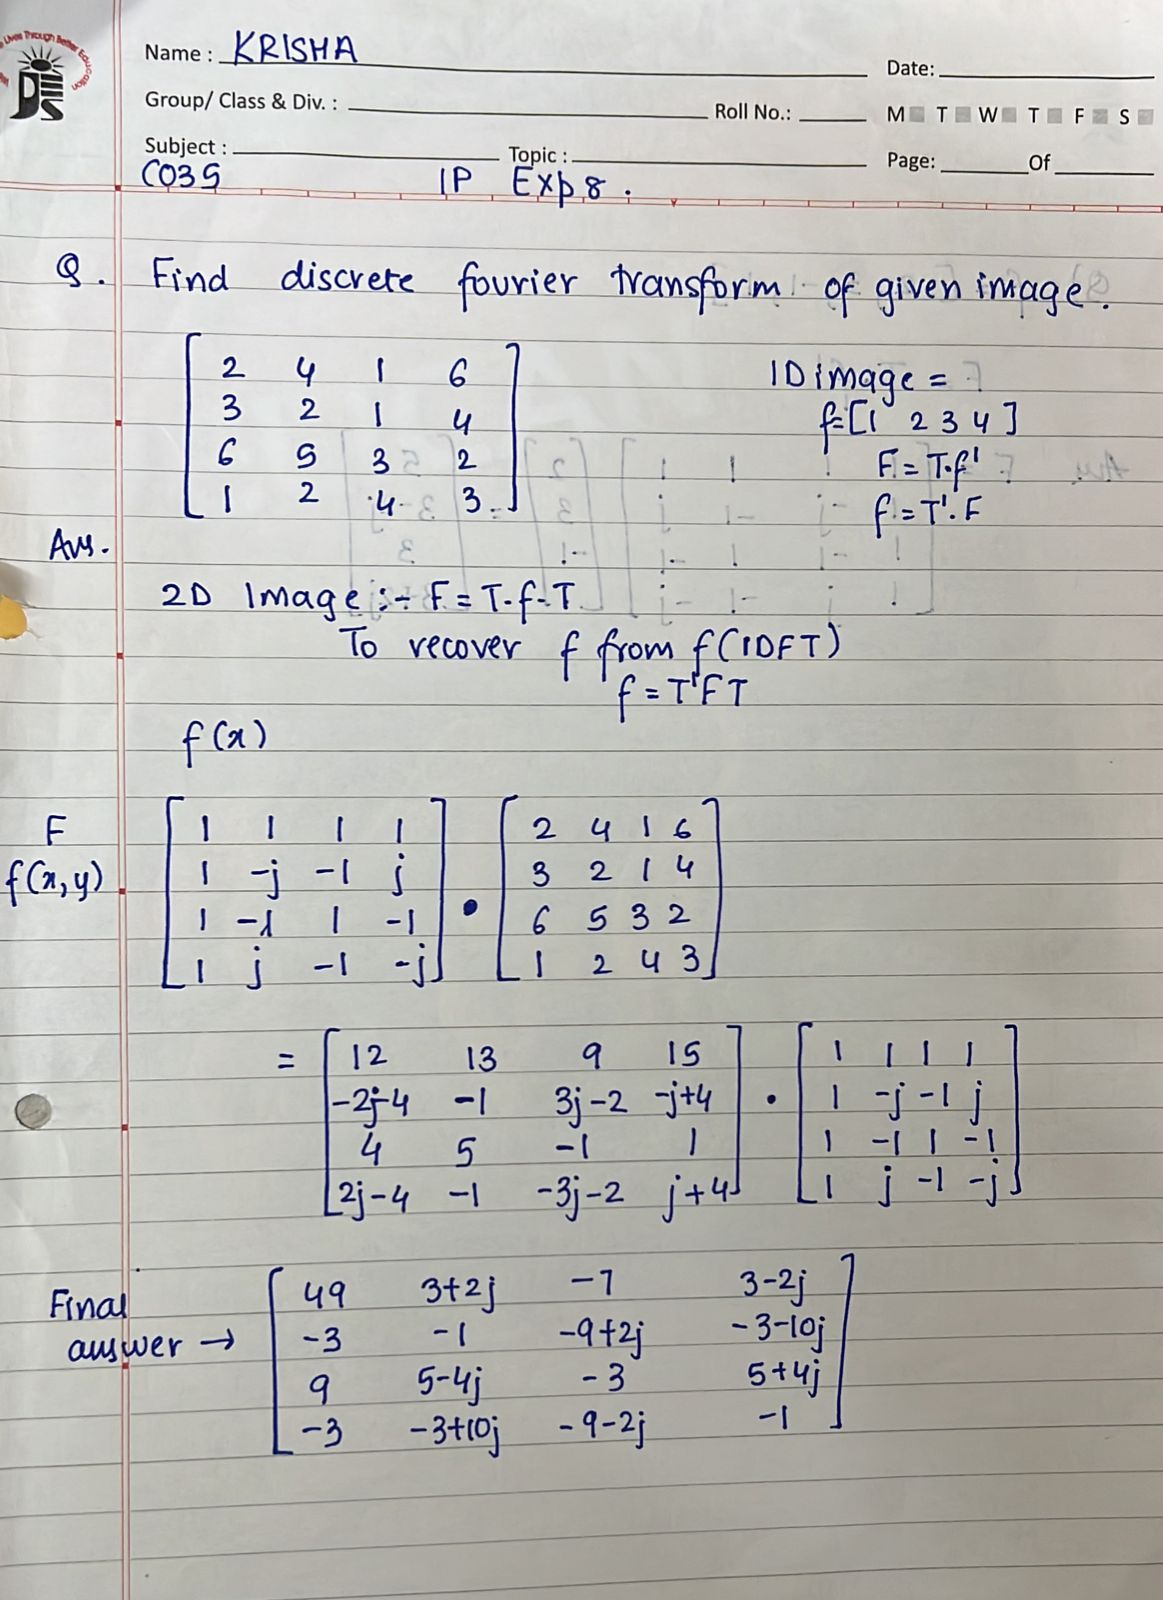

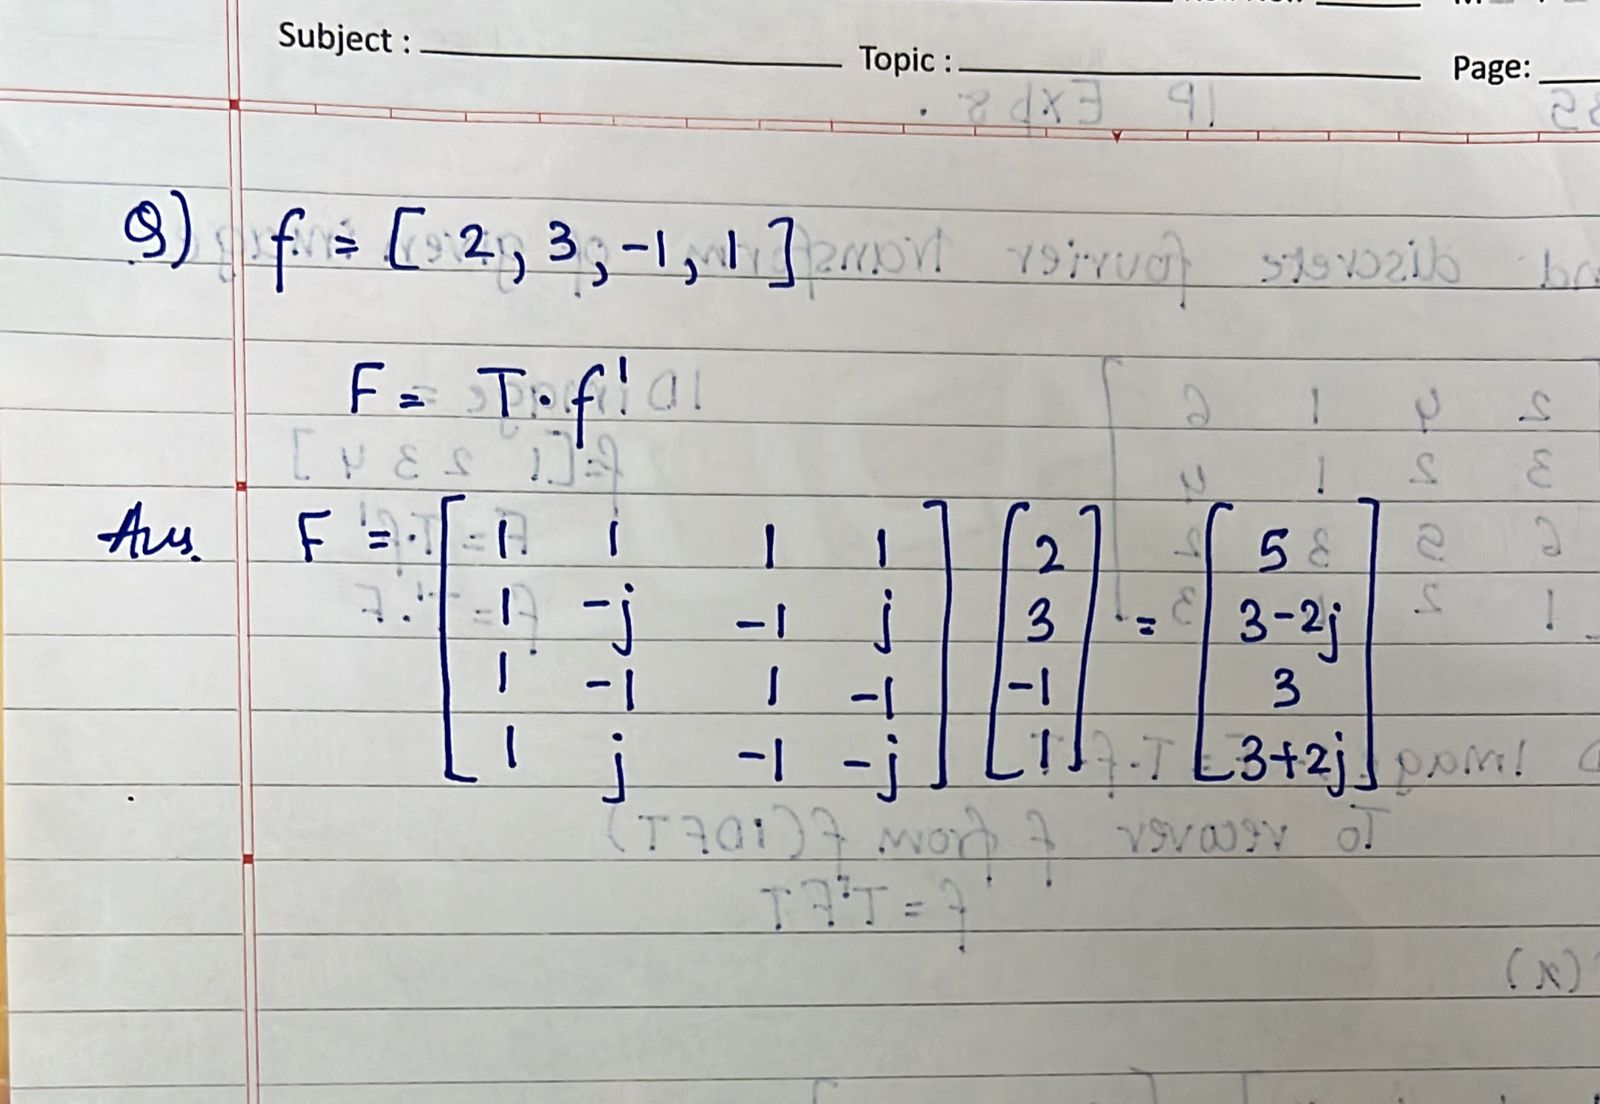

# Conclusion :

1. We implemented how to compute the DFT image using build in function.
2. Then we ploted the magnitude and phase spectrum of DFT image.
3. We also implemented low pass and high pass filter in frequency domain using  DFT.
4. Then lastly we, commented on subjective quality of reconstructed image.